Phân tích đại học bách khoa hà nội 



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
raw_df =  pd.read_csv('/workspaces/22022546_T--Nguy-n-D-ng/Data/ktqdNEU.csv')
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        114 non-null    int64  
 1   text                           113 non-null    object 
 2   post_text                      96 non-null     object 
 3   shared_text                    18 non-null     object 
 4   original_text                  0 non-null      float64
 5   time                           114 non-null    object 
 6   timestamp                      114 non-null    int64  
 7   image                          77 non-null     object 
 8   image_lowquality               114 non-null    object 
 9   images                         114 non-null    object 
 10  images_description             114 non-null    object 
 11  images_lowquality              114 non-null    object 
 12  images_lowquality_description  114 non-null    obj

CLEANING DATA

In [3]:
used_data = raw_df[['post_id','post_text','text','time','images_description','comments','shares','comments_full','reactors','reactions','reaction_count']]
used_data

,post_id,post_text,text,time,images_description,comments,shares,comments_full,reactors,reactions,reaction_count
0,732948108863591,"Thư viện điện tử 11 triệu USD, triệu cuốn sách...","Thư viện điện tử 11 triệu USD, triệu cuốn sách...",2023-11-25 11:25:19,"['May be an image of text', 'May be an image o...",175,77,"[{'comment_id': '648537020689218', 'comment_ur...",[],"{'like': 1123, 'love': 382, 'haha': 4, 'wow': ...",1542
1,323743073790793,NaN,"SUN, NOV 26\nChương trình trải nghiệm: 1 ngày ...",2023-11-24 10:31:29,[],628,0,[],NaN,NaN,1300
2,732286135596455,Trường Đại học Kinh tế Quốc dân tổ chức thành ...,Trường Đại học Kinh tế Quốc dân tổ chức thành ...,2023-11-24 07:07:41,"[""May be an image of 1 person, dais and text t...",0,0,[],"[{'name': 'Lê Quang Mênhh', 'link': 'https://f...","{'like': 82, 'love': 7}",89
3,730862365738832,CHÚC MỪNG PGS.TS. LÊ THANH HÀ - KHOA KINH TẾ H...,CHÚC MỪNG PGS.TS. LÊ THANH HÀ - KHOA KINH TẾ H...,2023-11-21 14:17:08,[],55,22,"[{'comment_id': '250924264662383', 'comment_ur...","[{'name': 'Thùy Linh', 'link': 'https://facebo...","{'like': 840, 'love': 364, 'wow': 12, 'care': 11}",1227
4,730382429120159,Ngày 20/11 hàng năm không chỉ là dịp để tri ân...,Ngày 20/11 hàng năm không chỉ là dịp để tri ân...,2023-11-20 16:02:01,"['May be an image of 15 people and text', 'May...",1,8,[],"[{'name': 'Bao Thanh Thien', 'link': 'https://...","{'like': 872, 'love': 431, 'care': 11}",1314
...,...,...,...,...,...,...,...,...,...,...,...
109,676193010732292,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-27 00:00:07,[],220,72,"[{'comment_id': '1354054158850753', 'comment_u...","[{'name': 'Mai Trang', 'link': 'https://facebo...","{'like': 656, 'love': 244, 'haha': 2, 'wow': 1...",907
110,1270136470311946,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-26 05:59:52,[],111,48,"[{'comment_id': '643658751072857', 'comment_ur...","[{'name': 'Phan Kim Nhã', 'link': 'https://fac...","{'like': 193, 'love': 124, 'care': 3}",320
111,1237176660290613,NaN,"SAT, AUG 26\nLỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY N...",2023-08-26 05:36:06,[],5,0,[],NaN,NaN,218
112,1358907194696015,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-26 00:01:04,[],988,272,"[{'comment_id': '823626852603976', 'comment_ur...","[{'name': 'Quang Thao Phan', 'link': 'https://...","{'like': 2804, 'love': 1257, 'haha': 12, 'wow'...",4105


In [4]:
cleaned_data = used_data.fillna({"reactions" : "{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'care': 0, 'sad': 0, 'angry': 0}",
                                "post_text" : "No post text"})
def replace_empty_string(value):
    return value if ((isinstance(value, str)) and (value != '[]')) else 'No photo description available'
def replace_empty_comment(cm):
    return cm if ((isinstance(cm, str)) and (cm != '[]')) else 'No comment available'
def replace_empty_reactors(r):
    return r if ((isinstance(r, str)) and (r != '[]' or r != 'NaN')) else 'No reactors available'
def reset_reaction_count(rc):
    for i in range(len(rc)):
        if cleaned_data['reactions'][i] == "{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'care': 0, 'sad': 0, 'angry': 0}":
             cleaned_data.loc[i, 'reaction_count'] = 0
cleaned_data["images_description"] = cleaned_data["images_description"].apply(replace_empty_string)
cleaned_data["comments_full"] = cleaned_data["comments_full"].apply(replace_empty_comment)
cleaned_data["reactors"] = cleaned_data["reactors"].apply(replace_empty_reactors)
reset_reaction_count(cleaned_data)
cleaned_data

,post_id,post_text,text,time,images_description,comments,shares,comments_full,reactors,reactions,reaction_count
0,732948108863591,"Thư viện điện tử 11 triệu USD, triệu cuốn sách...","Thư viện điện tử 11 triệu USD, triệu cuốn sách...",2023-11-25 11:25:19,"['May be an image of text', 'May be an image o...",175,77,"[{'comment_id': '648537020689218', 'comment_ur...",[],"{'like': 1123, 'love': 382, 'haha': 4, 'wow': ...",1542
1,323743073790793,No post text,"SUN, NOV 26\nChương trình trải nghiệm: 1 ngày ...",2023-11-24 10:31:29,No photo description available,628,0,No comment available,No reactors available,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0
2,732286135596455,Trường Đại học Kinh tế Quốc dân tổ chức thành ...,Trường Đại học Kinh tế Quốc dân tổ chức thành ...,2023-11-24 07:07:41,"[""May be an image of 1 person, dais and text t...",0,0,No comment available,"[{'name': 'Lê Quang Mênhh', 'link': 'https://f...","{'like': 82, 'love': 7}",89
3,730862365738832,CHÚC MỪNG PGS.TS. LÊ THANH HÀ - KHOA KINH TẾ H...,CHÚC MỪNG PGS.TS. LÊ THANH HÀ - KHOA KINH TẾ H...,2023-11-21 14:17:08,No photo description available,55,22,"[{'comment_id': '250924264662383', 'comment_ur...","[{'name': 'Thùy Linh', 'link': 'https://facebo...","{'like': 840, 'love': 364, 'wow': 12, 'care': 11}",1227
4,730382429120159,Ngày 20/11 hàng năm không chỉ là dịp để tri ân...,Ngày 20/11 hàng năm không chỉ là dịp để tri ân...,2023-11-20 16:02:01,"['May be an image of 15 people and text', 'May...",1,8,No comment available,"[{'name': 'Bao Thanh Thien', 'link': 'https://...","{'like': 872, 'love': 431, 'care': 11}",1314
...,...,...,...,...,...,...,...,...,...,...,...
109,676193010732292,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-27 00:00:07,No photo description available,220,72,"[{'comment_id': '1354054158850753', 'comment_u...","[{'name': 'Mai Trang', 'link': 'https://facebo...","{'like': 656, 'love': 244, 'haha': 2, 'wow': 1...",907
110,1270136470311946,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-26 05:59:52,No photo description available,111,48,"[{'comment_id': '643658751072857', 'comment_ur...","[{'name': 'Phan Kim Nhã', 'link': 'https://fac...","{'like': 193, 'love': 124, 'care': 3}",320
111,1237176660290613,No post text,"SAT, AUG 26\nLỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY N...",2023-08-26 05:36:06,No photo description available,5,0,No comment available,No reactors available,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",0
112,1358907194696015,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-26 00:01:04,No photo description available,988,272,"[{'comment_id': '823626852603976', 'comment_ur...","[{'name': 'Quang Thao Phan', 'link': 'https://...","{'like': 2804, 'love': 1257, 'haha': 12, 'wow'...",4105


Bài viết có lượt tương tác cao nhất 

Prepare data

In [5]:
month = []
hour = []
days = []
Date = []
Time = []
for i in range(len(cleaned_data)):
    t = cleaned_data['time'][i].split(" ")
    p_time = t[1].split(":")
    p_date = t[0].split("-")
    Time.append(t[1])
    Date.append(t[0])
    month.append(int(p_date[1]))
    hour.append(int(p_time[0]))
    days.append(p_date[2])
cleaned_data['Day'] = days
cleaned_data['Month'] = month
cleaned_data['Date'] = Date
cleaned_data['Time'] = Time
cleaned_data['Hour'] = hour   

In [6]:
import ast
thich = []
yeu_thich = []
haha = []
wow = []
thuong_thuong = []
buon = []
phan_no = []
for i in range(len(cleaned_data)):
     if ((cleaned_data['reaction_count'][i] != 0)):
            dictionary_result = ast.literal_eval(cleaned_data['reactions'][i])
            so_luot_thich = dictionary_result.get('thích', 0) + dictionary_result.get('like',0)
            so_yeu_thich = dictionary_result.get('yêu thích', 0) + dictionary_result.get('love', 0)
            so_haha = dictionary_result.get('haha', 0)
            so_wow = dictionary_result.get('wow',0)
            so_thuong_thuong = dictionary_result.get('thương thương',0) +dictionary_result.get('care', 0)
            so_buon = dictionary_result.get('buồn', 0) + dictionary_result.get('sad', 0)
            so_phan_no = dictionary_result.get('phẫn nộ',0) + dictionary_result.get('angry', 0)
            thich.append(so_luot_thich)
            yeu_thich.append(so_yeu_thich)
            haha.append(so_haha)
            wow.append(so_wow)
            thuong_thuong.append(so_thuong_thuong)
            buon.append(so_buon)
            phan_no.append(so_phan_no)
     else:
            thich.append(0)
            yeu_thich.append(0)
            haha.append(0)
            wow.append(0)
            thuong_thuong.append(0)
            buon.append(0)
            phan_no.append(0)

In [7]:
cleaned_data['Thích'] = thich
cleaned_data['Yêu_thích'] = yeu_thich
cleaned_data['Haha'] = haha
cleaned_data['Wow'] = wow
cleaned_data['Thương_thương'] = thuong_thuong
cleaned_data['Buồn'] = buon
cleaned_data['Phẫn_nộ'] = phan_no

In [8]:
sorted_data = cleaned_data.sort_values(by = 'reaction_count', ascending=False)
sorted_data

,post_id,post_text,text,time,images_description,comments,shares,comments_full,reactors,reactions,...,Date,Time,Hour,Thích,Yêu_thích,Haha,Wow,Thương_thương,Buồn,Phẫn_nộ
95,685739823584420,No post text,NaN,2023-09-06 03:24:12,['May be an image of text'],114,18,"[{'comment_id': '6464439700339100', 'comment_u...","[{'name': 'Dương Ngọc Lan', 'link': 'https://f...","{'like': 4753, 'love': 1771, 'haha': 26, 'wow'...",...,2023-09-06,03:24:12,3,4753,1771,26,7,44,15,1
44,712447980913604,CHÚC MỪNG NGÀY PHỤ NỮ VIỆT NAM 20/10\n\n🌺 Nhân...,CHÚC MỪNG NGÀY PHỤ NỮ VIỆT NAM 20/10\n\n🌺 Nhân...,2023-10-20 01:00:09,"[""May be an image of text that says 'NH CONICN...",361,132,"[{'comment_id': '822701516273487', 'comment_ur...","[{'name': 'Danh Minh', 'link': 'https://facebo...","{'like': 3136, 'love': 2334, 'haha': 34, 'wow'...",...,2023-10-20,01:00:09,1,3136,2334,34,16,78,8,0
107,680243077467428,"Nam thanh, Nữ tú rạng ngời trong Lễ tốt nghiệp...","Nam thanh, Nữ tú rạng ngời trong Lễ tốt nghiệp...",2023-08-27 14:31:57,"['No photo description available.', 'No photo ...",164,45,"[{'comment_id': '1434628217117936', 'comment_u...","[{'name': 'Chu Mạnh', 'link': 'https://faceboo...","{'like': 4056, 'love': 1328, 'haha': 9, 'wow':...",...,2023-08-27,14:31:57,14,4056,1328,9,2,22,3,0
112,1358907194696015,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,LỄ TỐT NGHIỆP ĐẠI HỌC CHÍNH QUY NĂM 2023 ( PHI...,2023-08-26 00:01:04,No photo description available,988,272,"[{'comment_id': '823626852603976', 'comment_ur...","[{'name': 'Quang Thao Phan', 'link': 'https://...","{'like': 2804, 'love': 1257, 'haha': 12, 'wow'...",...,2023-08-26,00:01:04,0,2804,1257,12,9,21,1,1
77,696552629169806,LỘ DIỆN NHỮNG TÂN SINH VIÊN ĐẠT THÀNH TÍCH CAO...,LỘ DIỆN NHỮNG TÂN SINH VIÊN ĐẠT THÀNH TÍCH CAO...,2023-09-24 04:57:42,"[""May be an image of 8 people, dais and text t...",133,53,"[{'comment_id': '1448886172557142', 'comment_u...","[{'name': 'Danh Minh', 'link': 'https://facebo...","{'like': 2472, 'love': 774, 'haha': 2, 'wow': ...",...,2023-09-24,04:57:42,4,2472,774,2,10,18,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,857064789031139,No post text,"WED, OCT 11\nĐại hội lần thứ XVI Công đoàn Giá...",2023-10-11 03:40:24,No photo description available,0,0,No comment available,No reactors available,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",...,2023-10-11,03:40:24,3,0,0,0,0,0,0,0
1,323743073790793,No post text,"SUN, NOV 26\nChương trình trải nghiệm: 1 ngày ...",2023-11-24 10:31:29,No photo description available,628,0,No comment available,No reactors available,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",...,2023-11-24,10:31:29,10,0,0,0,0,0,0,0
59,709385851034617,No post text,"SAT, OCT 7\nLỄ KHAI GIẢNG HỆ VỪA HỌC VỪA LÀM",2023-10-06 05:51:24,No photo description available,1,0,No comment available,No reactors available,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",...,2023-10-06,05:51:24,5,0,0,0,0,0,0,0
60,301086612656028,No post text,"SAT, OCT 7\nLỄ KHAI GIẢNG VÀ TRAO BẰNG TIẾN SĨ",2023-10-06 03:16:26,No photo description available,0,0,No comment available,No reactors available,"{'like': 0, 'love': 0, 'haha': 0, 'wow': 0, 'c...",...,2023-10-06,03:16:26,3,0,0,0,0,0,0,0


ANALYSE DATA

Bài đăng có nhiều lượt tương tác nhất 

In [9]:
highest_reaction_post = sorted_data.iloc[0]
highest_reaction_post

post_id                                                 685739823584420
post_text                                                  No post text
text                                                                NaN
time                                                2023-09-06 03:24:12
images_description                          ['May be an image of text']
comments                                                            114
shares                                                               18
comments_full         [{'comment_id': '6464439700339100', 'comment_u...
reactors              [{'name': 'Dương Ngọc Lan', 'link': 'https://f...
reactions             {'like': 4753, 'love': 1771, 'haha': 26, 'wow'...
reaction_count                                                     6617
Day                                                                  06
Month                                                                 9
Date                                                         202

Nội dung bài viết

In [10]:
highest_reaction_post['post_text']

'No post text'

Số lượt tương tác 

In [11]:
highest_reaction_post['reaction_count']

6617

In [12]:
highest_reaction_post['reactions']

"{'like': 4753, 'love': 1771, 'haha': 26, 'wow': 7, 'care': 44, 'sad': 15, 'angry': 1}"

In [13]:
first_row = highest_reaction_post
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']
reactions


{'like': 4753,
 'love': 1771,
 'haha': 26,
 'wow': 7,
 'care': 44,
 'sad': 15,
 'angry': 1,
 'shares': 18,
 'comments': 114}

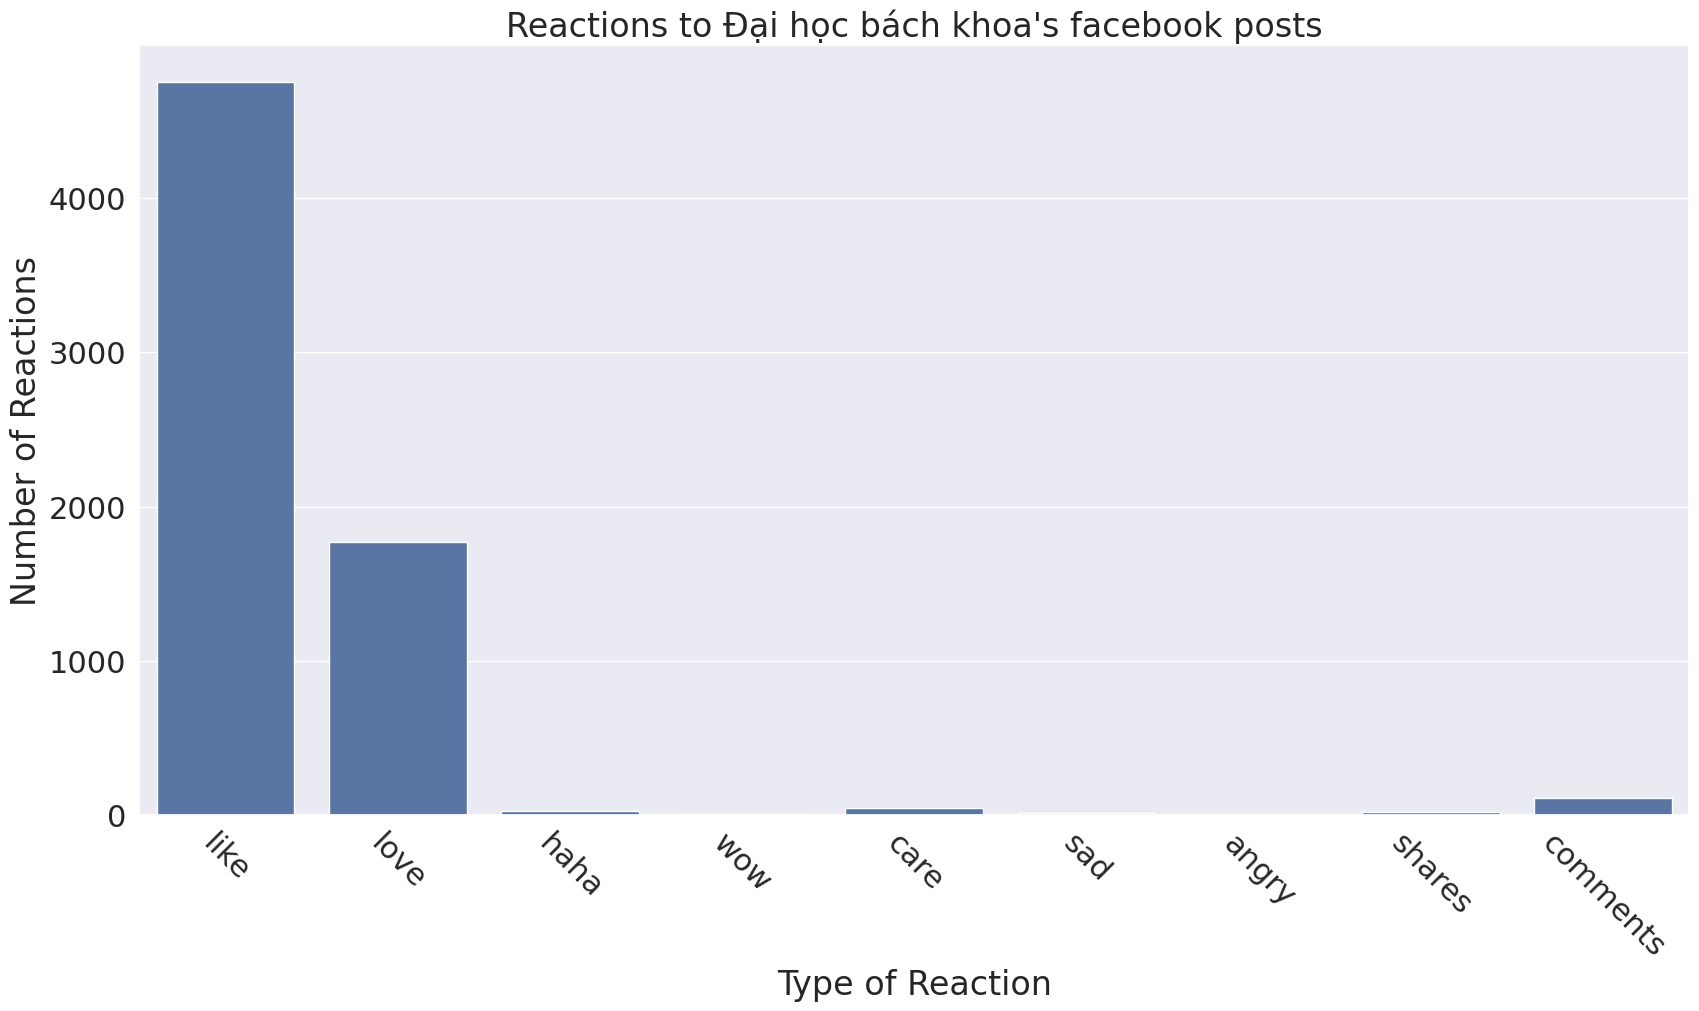

In [14]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(20,10)})
sns.set(font_scale=2)
# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions.keys()), y=list(reactions.values()))
ax.set_title("Reactions to Đại học bách khoa's facebook posts")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
plt.show()

Trung bình các bài viết 

In [15]:
cleaned_data['reaction_count'].mean()

781.5263157894736

In [16]:
cleaned_data['comments'].mean()

81.39473684210526

In [17]:
cleaned_data['shares'].mean()

21.56140350877193

Số lượng bài viết trong 3 tháng gần nhất

Text(0, 0.5, 'Số lượng bài viết')

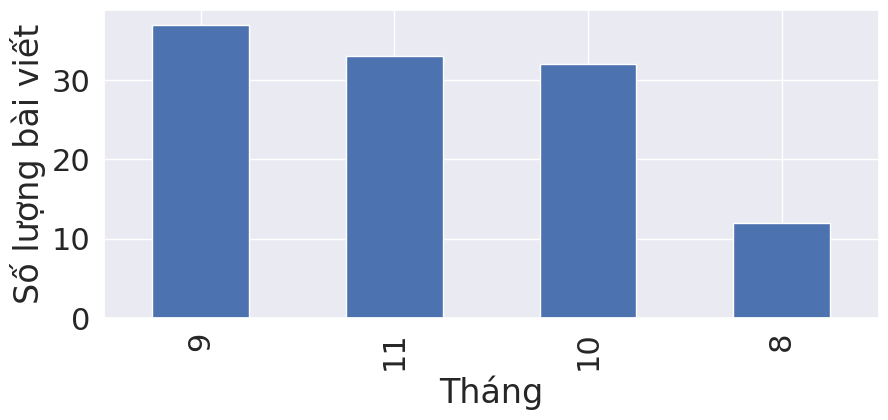

In [18]:
m = cleaned_data['Month'].value_counts()
bp = m.plot(kind='bar', figsize=(10,4))
bp.set_xlabel("Tháng")
bp.set_ylabel("Số lượng bài viết")

Thời điểm đăng bài 

Text(0, 0.5, 'Số bài đăng')

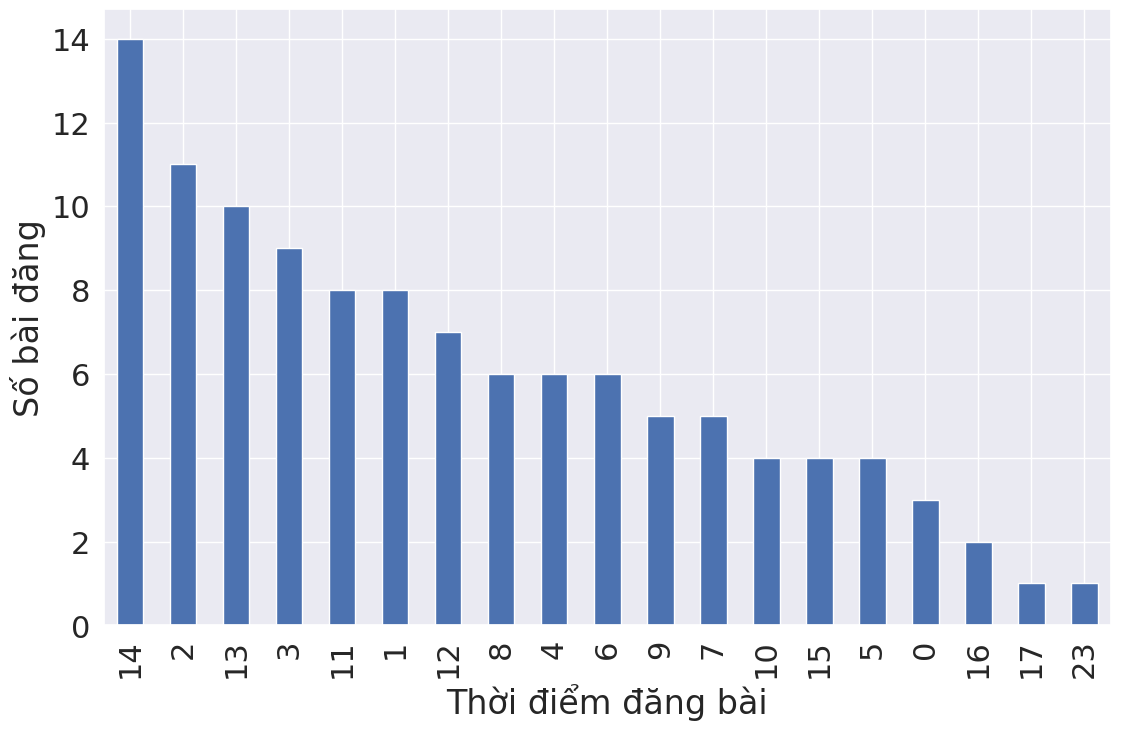

In [19]:
h = cleaned_data['Hour'].value_counts()
t = h.plot(kind = 'bar', figsize=(13,8))
t.set_xlabel('Thời điểm đăng bài')
t.set_ylabel('Số bài đăng')

Nhận xét: số bài đăng chủ yếu vào lúc 1-2h chiều và khoảng 2-3 giờ sáng

Tổng số lượng và tỷ lệ các reaction trong các bài viết 

In [20]:
s = pd.DataFrame({'Số lượng': [sum(thich),sum(yeu_thich),sum(haha),sum(wow),sum(thuong_thuong),sum(buon),sum(phan_no)],
                  'Phần trăm (%)': [(sum(thich)/sum(raw_df['reaction_count']))*100,
                                   (sum(yeu_thich)/sum(raw_df['reaction_count']))*100,
                                   (sum(haha)/sum(raw_df['reaction_count']))*100,
                                   (sum(wow)/sum(raw_df['reaction_count']))*100,
                                   (sum(thuong_thuong)/sum(raw_df['reaction_count']))*100,
                                   (sum(buon)/sum(raw_df['reaction_count']))*100,
                                   (sum(phan_no)/sum(raw_df['reaction_count']))*100]})
s.index = ['Thích','Yêu thích','Haha','Wow','Thương thương','Buồn','Phẫn nộ']
s

,Số lượng,Phần trăm (%)
Thích,63558,65.930851
Yêu thích,21455,22.255993
Haha,2154,2.234417
Wow,215,0.223027
Thương thương,709,0.735470
Buồn,997,1.034222
Phẫn nộ,6,0.006224


<Axes: >

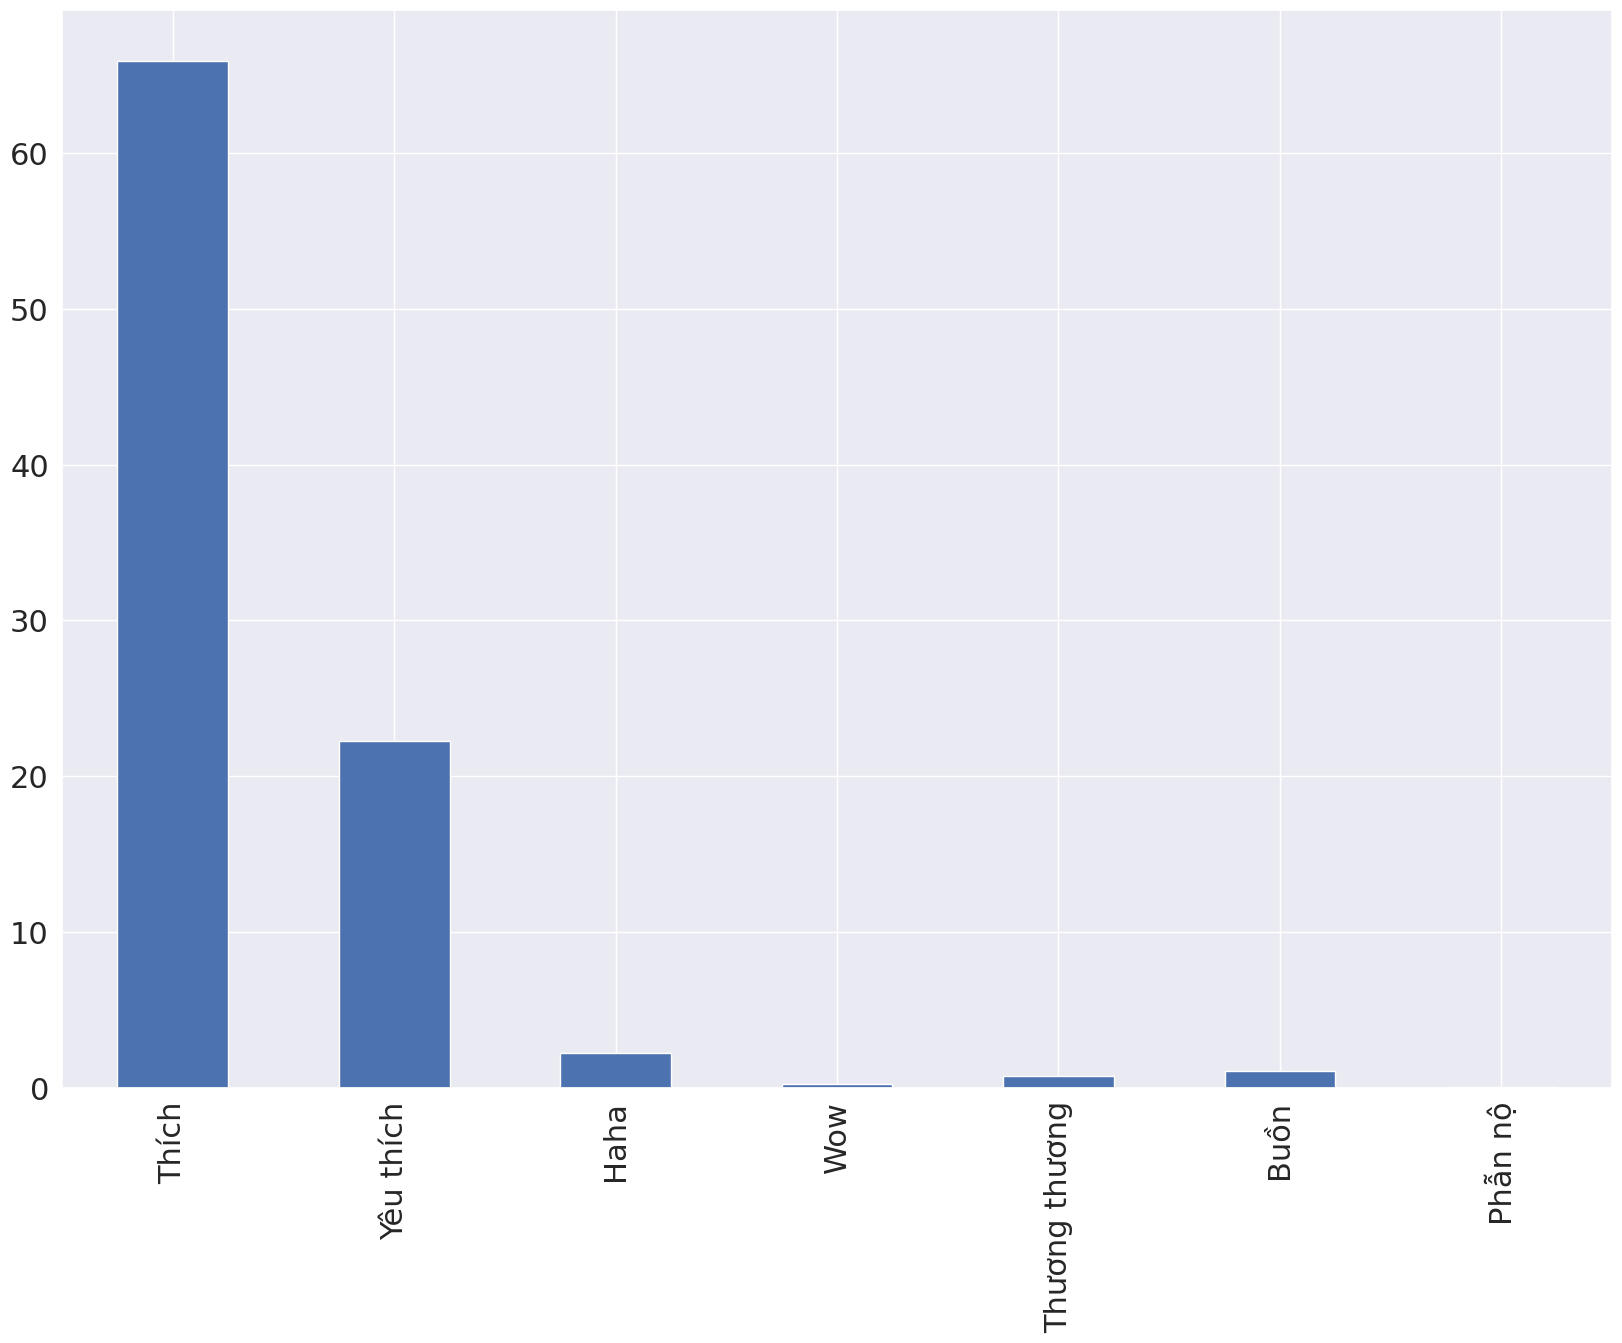

In [21]:
s['Phần trăm (%)'].plot(kind='bar', figsize=(20,14))

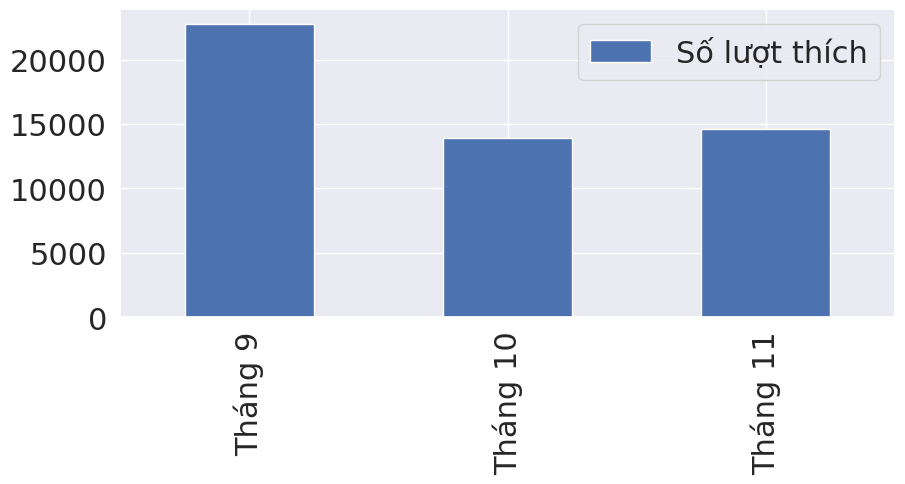

In [22]:
likes_of_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].Thích)
likes_of_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].Thích)
likes_of_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].Thích)
l = pd.DataFrame({'Số lượt thích': [likes_of_month_9,likes_of_month_10,likes_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

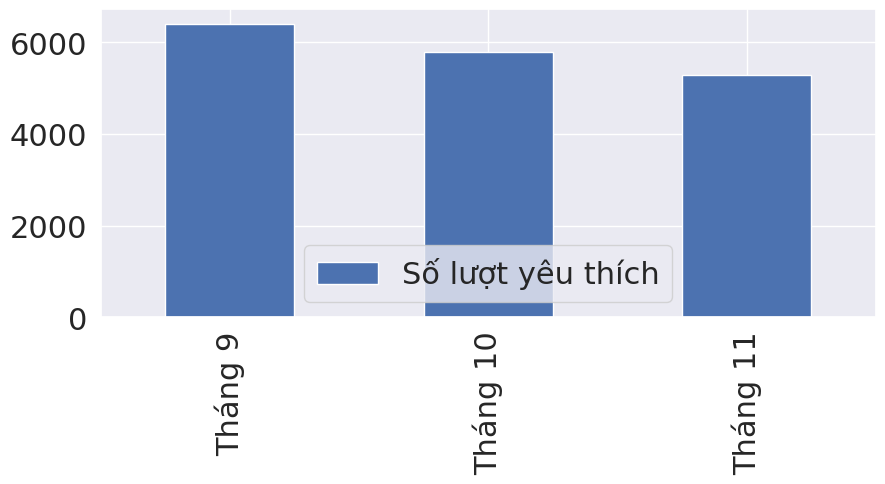

In [23]:
loves_of_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].Yêu_thích)
loves_of_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].Yêu_thích)
loves_of_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].Yêu_thích)
l = pd.DataFrame({'Số lượt yêu thích': [loves_of_month_9,loves_of_month_10,loves_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

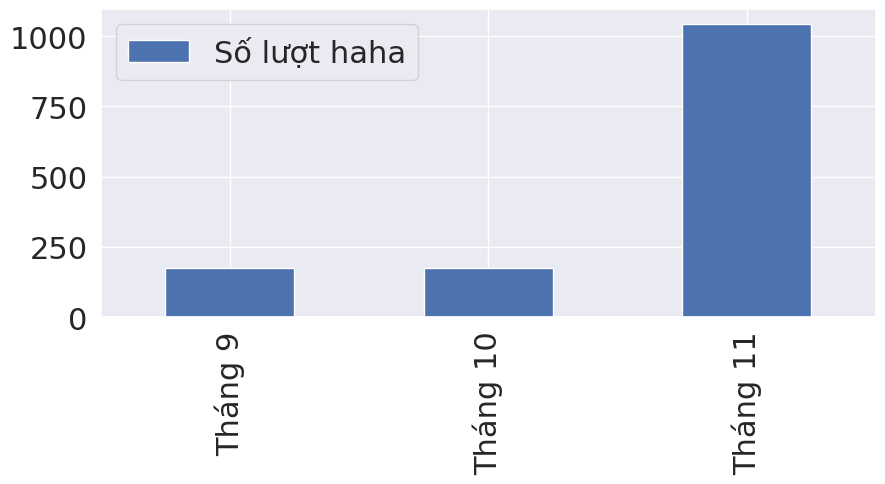

In [24]:
haha_of_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].Haha)
haha_of_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].Haha)
haha_of_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].Haha)
l = pd.DataFrame({'Số lượt haha': [haha_of_month_9,haha_of_month_10,haha_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

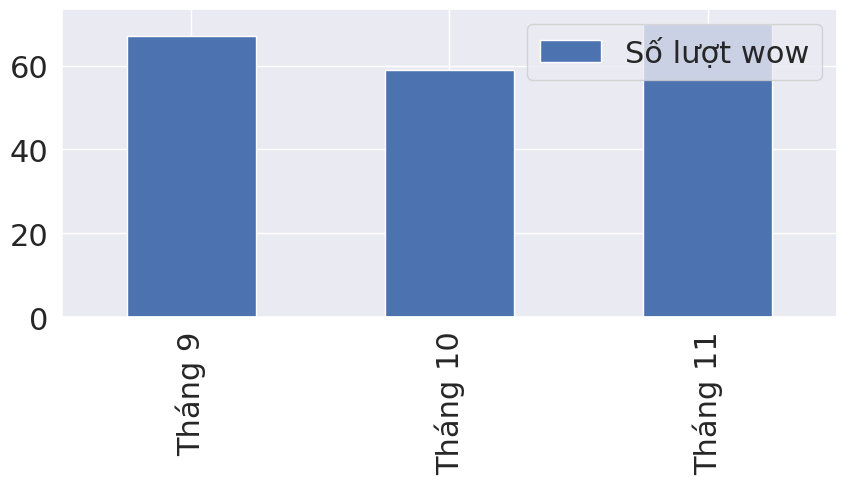

In [25]:
wow_of_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].Wow)
wow_of_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].Wow)
wow_of_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].Wow)
l = pd.DataFrame({'Số lượt wow': [wow_of_month_9,wow_of_month_10,wow_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

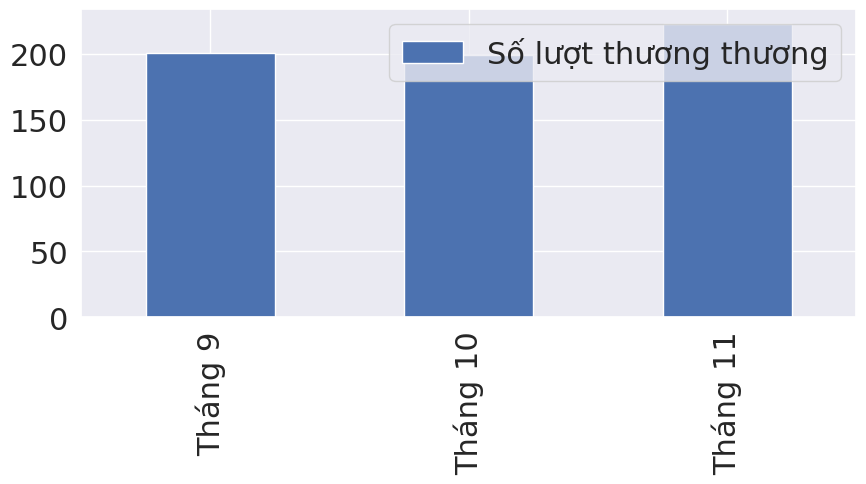

In [26]:
tt_of_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].Thương_thương)
tt_of_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].Thương_thương)
tt_of_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].Thương_thương)
l = pd.DataFrame({'Số lượt thương thương': [tt_of_month_9,tt_of_month_10,tt_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

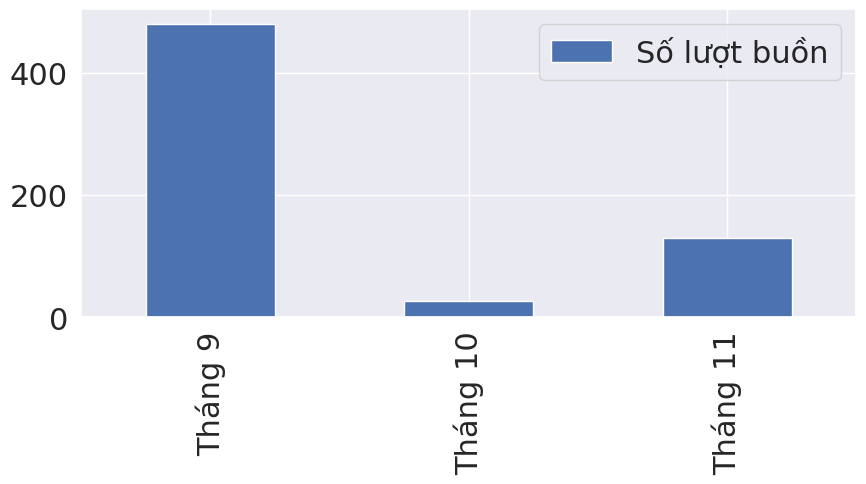

In [27]:
buon_of_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].Buồn)
buon_of_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].Buồn)
buon_of_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].Buồn)
l = pd.DataFrame({'Số lượt buồn': [buon_of_month_9,buon_of_month_10,buon_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,4))

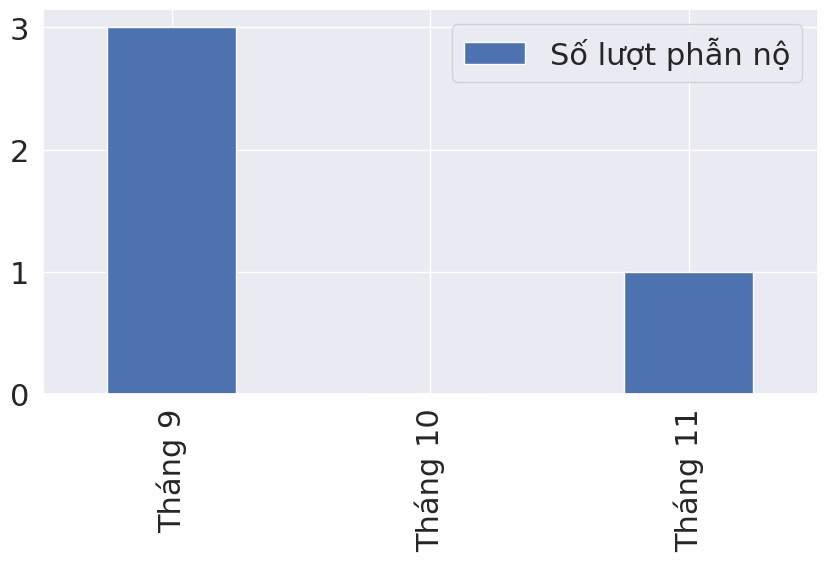

In [28]:
phan_no_of_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].Phẫn_nộ)
phan_no_of_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].Phẫn_nộ)
phan_no_of_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].Phẫn_nộ)
l = pd.DataFrame({'Số lượt phẫn nộ': [phan_no_of_month_9,phan_no_of_month_10,phan_no_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,5))

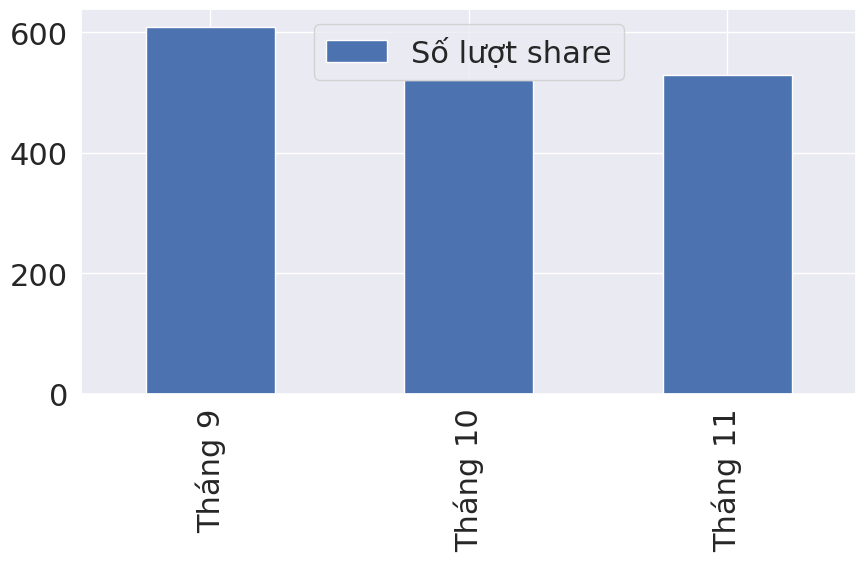

In [29]:
shares_of_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].shares)
shares_of_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].shares)
shares_of_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].shares)
l = pd.DataFrame({'Số lượt share': [shares_of_month_9,shares_of_month_10,shares_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,5))

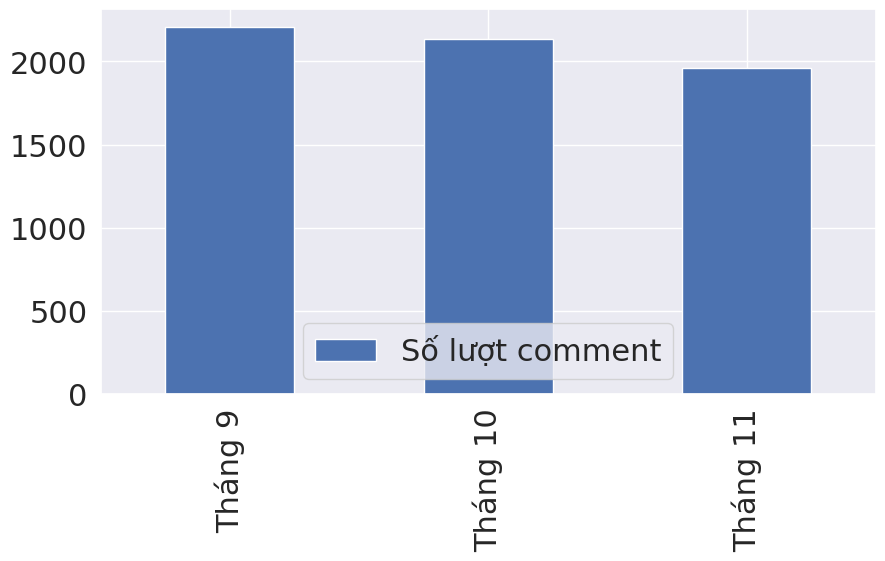

In [30]:
cm_of_month_9 = sum(cleaned_data.loc[cleaned_data['Month'] == 9].comments)
cm_of_month_10 = sum(cleaned_data.loc[cleaned_data['Month'] == 10].comments)
cm_of_month_11 = sum(cleaned_data.loc[cleaned_data['Month'] == 11].comments)
l = pd.DataFrame({'Số lượt comment': [cm_of_month_9,cm_of_month_10,cm_of_month_11]})
l.index = ['Tháng 9','Tháng 10','Tháng 11']
tab = l.plot(kind='bar',figsize=(10,5))

Nhận xét: Tháng 10 có số lượt tương tác của các reaction cao nhất. Tháng 10 cũng là tháng có nhiều lượt comment và lượt share nhất trong 3 tháng gần nhất 


Lượng tương tác theo từng tháng 


In [31]:
month_data = pd.DataFrame({"Thích" : [likes_of_month_9, likes_of_month_10, likes_of_month_11],
                           "Yêu_thích" : [loves_of_month_9, loves_of_month_10, loves_of_month_11],
                           "Wow" : [wow_of_month_9, wow_of_month_10, wow_of_month_11],
                           "Haha" : [haha_of_month_9, haha_of_month_10, haha_of_month_11],
                           "Thương_thương" : [tt_of_month_9, tt_of_month_10, tt_of_month_11],
                           "Buồn" : [buon_of_month_9, buon_of_month_10, buon_of_month_11],
                           "Phẫn_nộ" : [phan_no_of_month_9, phan_no_of_month_10, phan_no_of_month_11],
                           "Shares" : [shares_of_month_9, shares_of_month_10, shares_of_month_11],
                           "Comment" : [cm_of_month_9, cm_of_month_10, cm_of_month_11]})
month_data.index = ['Tháng_9', 'Tháng_10', 'Tháng_11']
month_data

,Thích,Yêu_thích,Wow,Haha,Thương_thương,Buồn,Phẫn_nộ,Shares,Comment
Tháng_9,22788,6408,67,175,201,480,3,608,2204
Tháng_10,13942,5788,59,175,199,26,0,520,2136
Tháng_11,14622,5289,70,1044,223,129,1,529,1959


<Axes: >

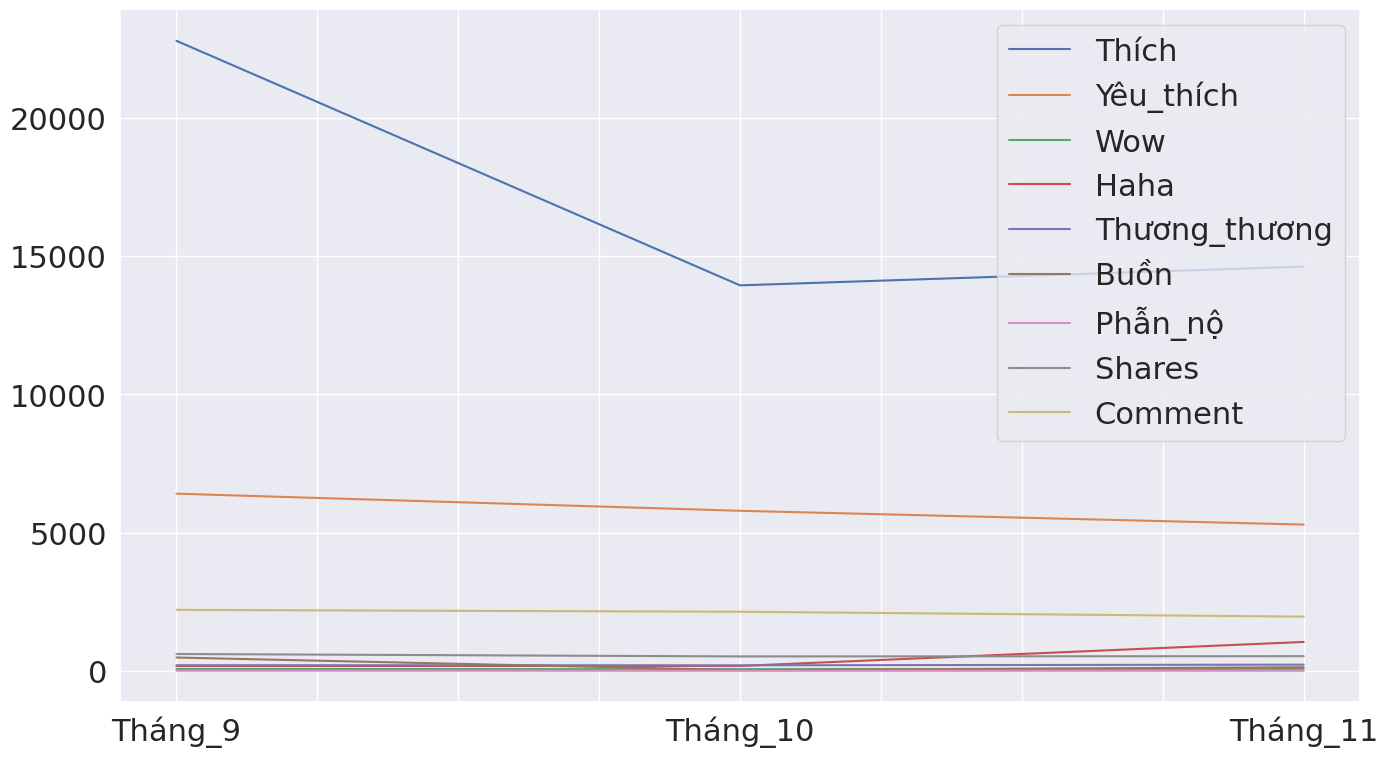

In [32]:
month_data.plot(figsize=(16,9))

In [33]:
cleaned_data['Date'].value_counts()

Date
2023-11-11    6
2023-09-28    4
2023-10-11    4
2023-09-24    3
2023-10-06    3
             ..
2023-10-22    1
2023-10-20    1
2023-10-19    1
2023-10-16    1
2023-08-25    1
Name: count, Length: 67, dtype: int64

Có thể thấy ngày 20/10 là ngày phụ nữ việt nam và cũng là ngày page có số lượng bài đăng nhiều nhất  

Các từ có tần xuất xuất hiện nhiều trong các bài viết 

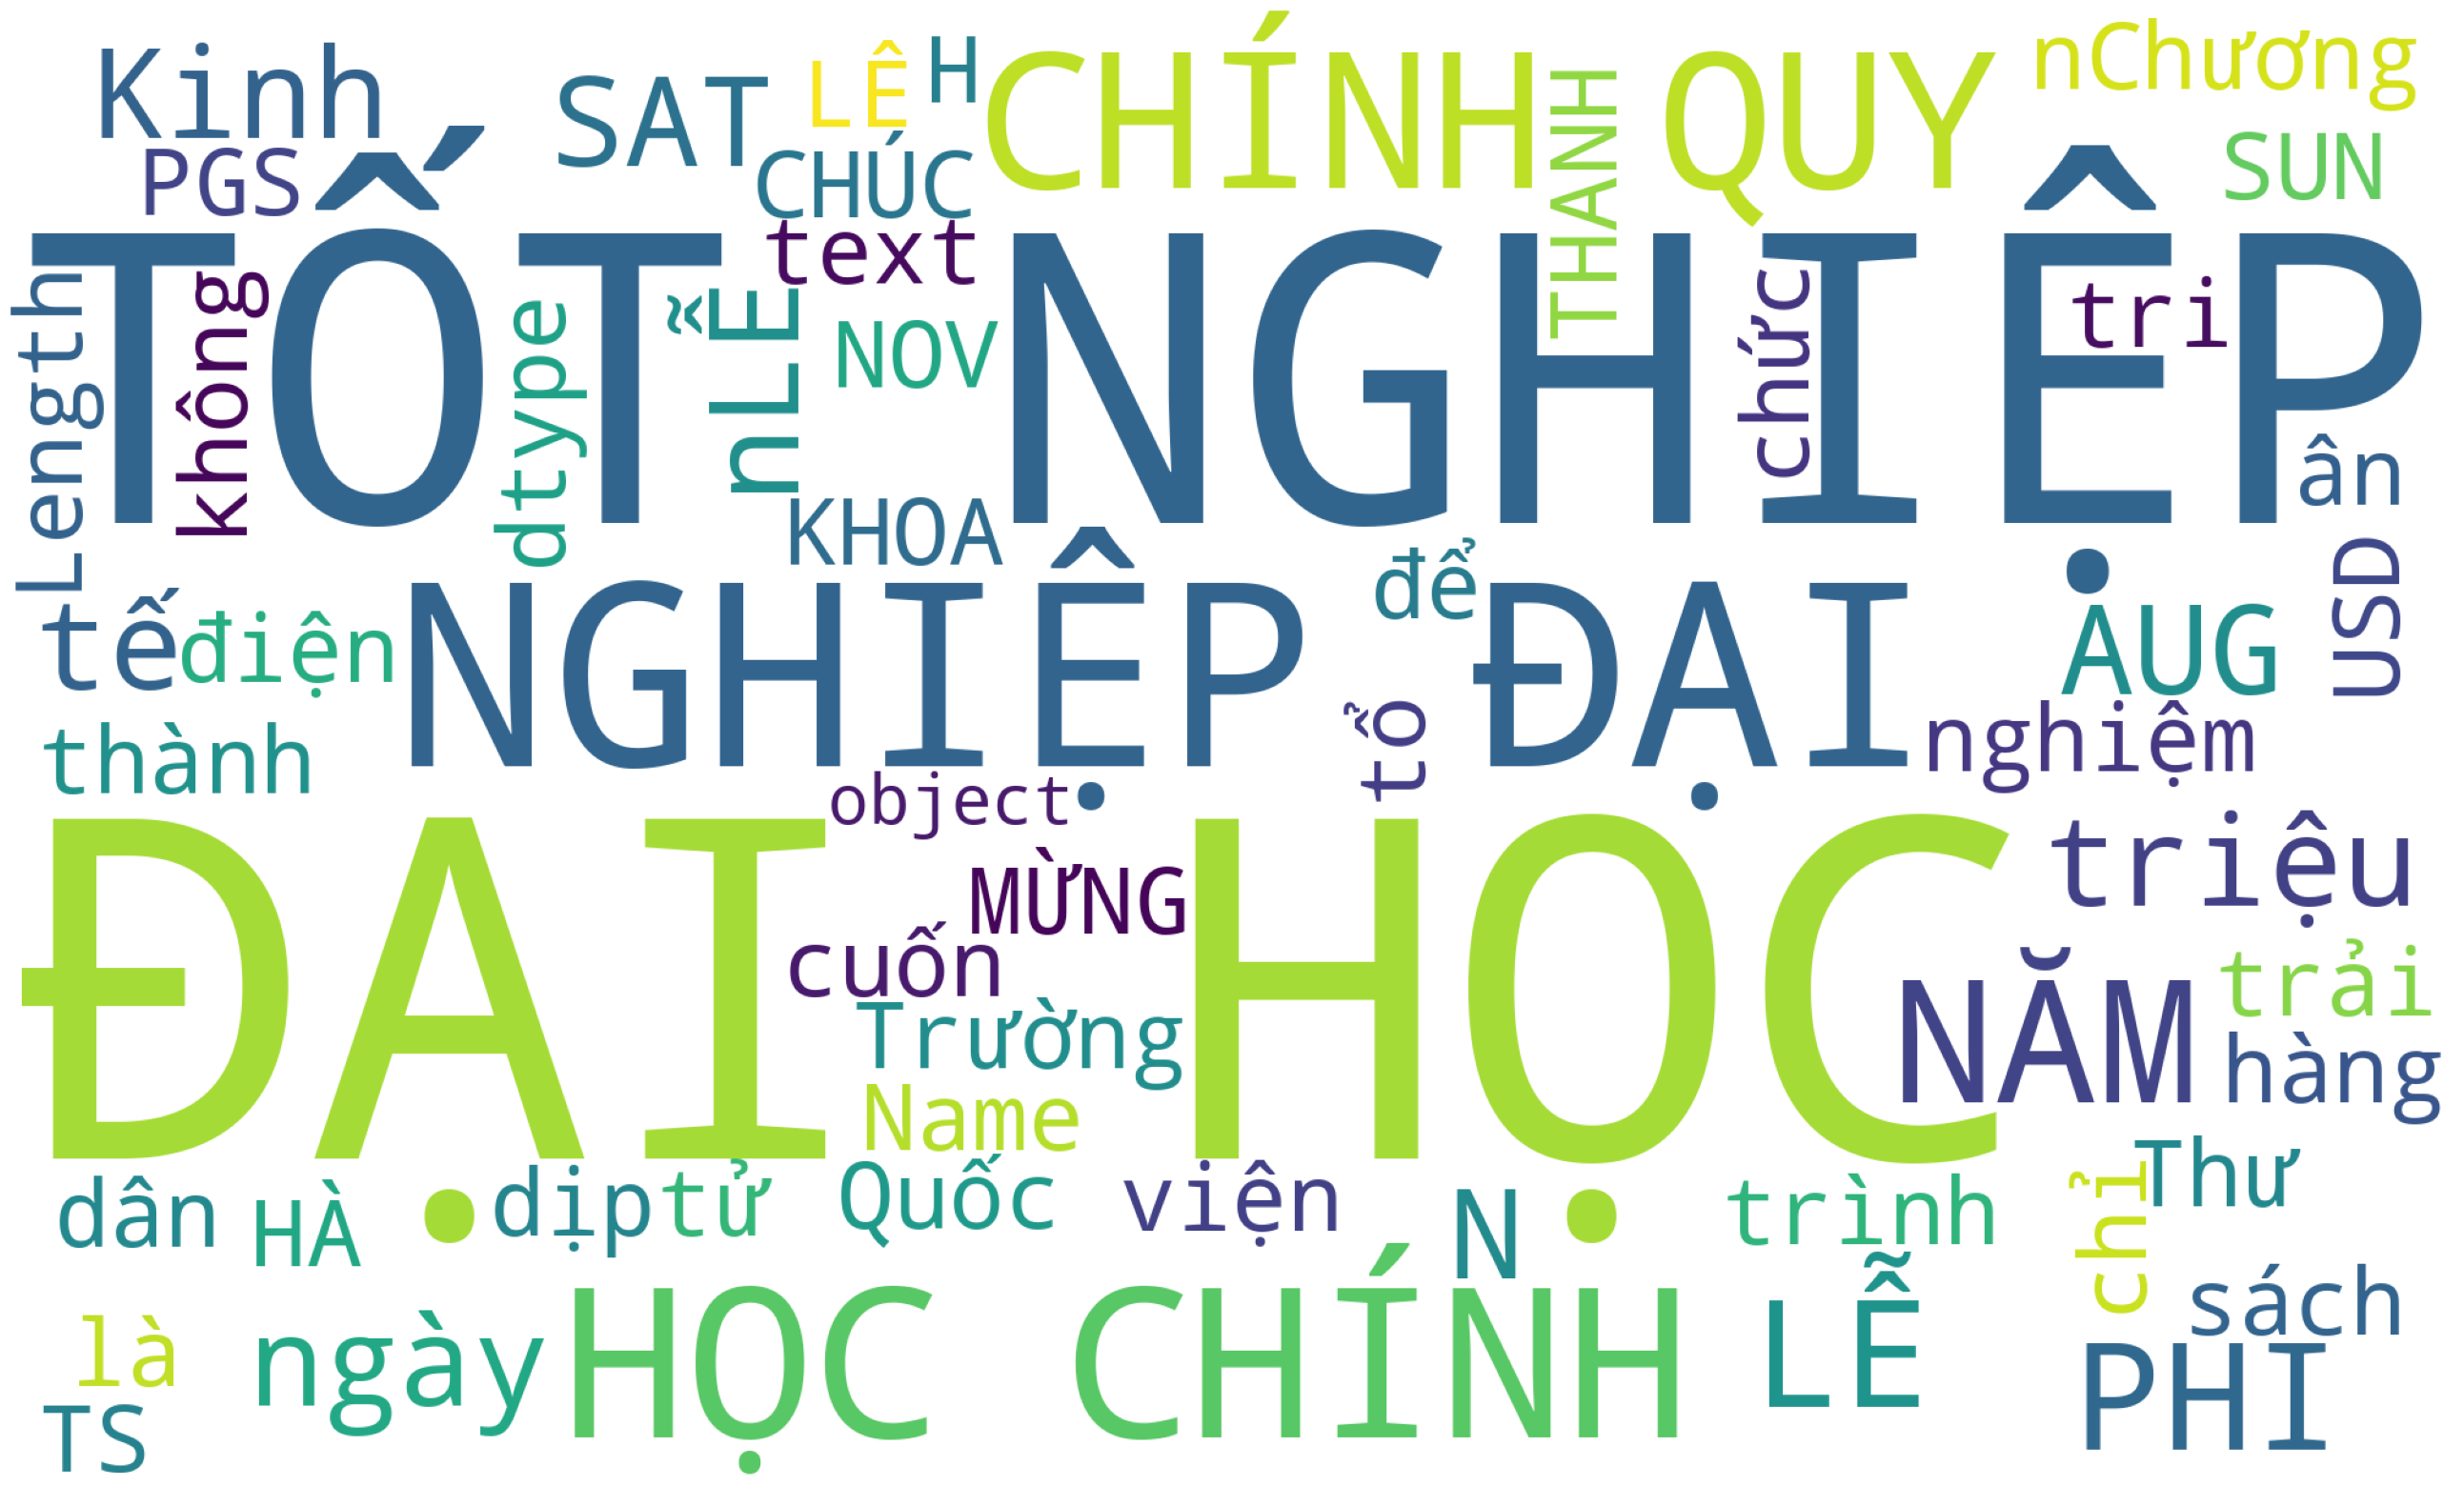

In [34]:
from wordcloud import WordCloud, STOPWORDS

text = str(cleaned_data['text'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Mô hình và dự đoán 

In [35]:
feature_cols = ['', '']
X = cleaned_data[feature_cols].values
y = cleaned_data.rental_gain_return.values

KeyError: "None of [Index(['', ''], dtype='object')] are in the [columns]"

In [ ]:
print(X.shape)
print(y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.num_iterations):
            
            y_pred = np.dot(X, self.weights) + self.bias

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            print("Error: ",i, np.sum(y_pred - y) / n_samples)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='r', marker='x', label='Predicted', alpha=1)

ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c='b', marker='o', label='Actual', alpha=0.01)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

In [ ]:
np.unique(y_pred)


In [ ]:
np.unique(y_test)